<a href="https://colab.research.google.com/github/vemulaprasanthi/Machine_Learning/blob/main/Exp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-18-df04f1812984>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i, i] = np.exp(-((test_point - xi) ** 2) / (2 * tau ** 2))


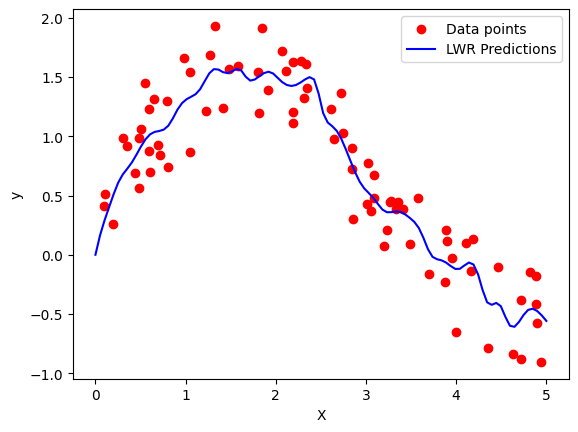

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (sine wave with noise)
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)  # X data
y = np.sin(X).ravel() + np.random.rand(80)  # y data with noise

# Locally Weighted Regression (LWR)
def locally_weighted_regression(test_point, X, y, tau):
    m, n = X.shape
    weights = np.zeros((m, m))

    # Calculate the weights for each training point
    for i in range(m):
        xi = X[i]
        weights[i, i] = np.exp(-((test_point - xi) ** 2) / (2 * tau ** 2))

    # Compute theta using the weighted least squares
    # X is (m x 1), weights is (m x m), y is (m,)
    X_weighted = X.T @ weights
    theta = np.linalg.pinv(X_weighted @ X) @ (X_weighted @ y)

    # Predict the value for the test point
    return test_point * theta

# Predict for a set of test points
tau = 0.1  # Bandwidth parameter
X_test = np.linspace(0, 5, 100).reshape(100, 1)  # Test points (reshaped to be a column vector)
y_pred = [locally_weighted_regression(test_point, X, y, tau) for test_point in X_test]

# Plot the data and predictions
plt.scatter(X, y, c='r', label='Data points')  # Scatter plot of data points
plt.plot(X_test, y_pred, c='b', label='LWR Predictions')  # Line plot of predictions
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
